# Тестовое задание 

Есть датасэт https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page о такси в Нью-Йорке.

Используйте данные за декабрь 2019 и январь 2020 года.

Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?

Найдите аномальные поездки. Почему именно эти поездки вы считаете аномальными?

Постройте распределение по стоимости поездок. Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?

Из данных постройте модель, которая описывает тариф (т.е. стоимость поездки от других факторов).

Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.

## Знакомство с данными

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Загрузим датасеты. Выведем первые строки, чтобы убедиться в корректном считывании данных:

In [17]:
yellow_tripdata_1 = pd.read_csv('yellow_tripdata_2019-12.csv', low_memory=False)
yellow_tripdata_2 = pd.read_csv('yellow_tripdata_2020-01.csv', low_memory=False)

In [18]:
green_tripdata_1 = pd.read_csv('green_tripdata_2019-12.csv', low_memory=False)
green_tripdata_2 = pd.read_csv('green_tripdata_2020-01.csv', low_memory=False)

Создадим список с названиями датасетов для удобства

In [41]:
dataframes = ['yellow_tripdata_1', 'yellow_tripdata_2', 'green_tripdata_1', 'green_tripdata_2']

In [34]:
yellow_tripdata_1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [35]:
yellow_tripdata_2.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5


In [36]:
green_tripdata_1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.5,0.5,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.0,0.5,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0


In [37]:
green_tripdata_2.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.5,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.0
1,2.0,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.0,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.0


столбцы в датасетах для "желтого" и "зеленого" такси отличаются:

In [44]:
for d in dataframes:
    print(d, locals()[d].shape)

yellow_tripdata_1 (6896317, 18)
yellow_tripdata_2 (6405008, 18)
green_tripdata_1 (450627, 20)
green_tripdata_2 (447770, 20)


Найдем столбцы в которых есть изменения:

In [65]:
list(set(green_tripdata_1) - set(yellow_tripdata_1)) + list(set(yellow_tripdata_1) - set(green_tripdata_1))

['lpep_pickup_datetime',
 'ehail_fee',
 'lpep_dropoff_datetime',
 'trip_type',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime']

Судя по data_dictionary (pdf в папке проекта) lpep = tpep, поэтому разница в trip_type и ehail_fee

trip_type - A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
1= Street-hail
2= Dispatch

Данных о ehail_fee нет. Посмотрим что содержится в столбце

In [69]:
green_tripdata_1.ehail_fee

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
450622   NaN
450623   NaN
450624   NaN
450625   NaN
450626   NaN
Name: ehail_fee, Length: 450627, dtype: float64

In [70]:
green_tripdata_1.ehail_fee.count()

0

ehail_fee можно удалить

## Объединение с данных

In [ ]:
['yellow_tripdata_1', 'yellow_tripdata_2', 'green_tripdata_1', 'green_tripdata_2']

In [72]:
data_y = pd.concat([yellow_tripdata_1,yellow_tripdata_2])

Что бы не терять данные, добавим признак к данным о желтых такси:

In [74]:
data_y['trip_type'] = 3

In [82]:
data_g = pd.concat([green_tripdata_1,green_tripdata_2])

In [83]:
data_g = data_g.drop(columns='ehail_fee')

In [86]:
data_g = data_g.rename(columns={"lpep_pickup_datetime": "tpep_pickup_datetime", "lpep_dropoff_datetime": "tpep_dropoff_datetime"})

Получаем итоговый датасет:

In [91]:
df = pd.concat([data_y, data_g])

проверим рамер таблицы:

In [93]:
df.shape

(14199722, 19)

Сохраним на всякий случай)

In [94]:
# df.to_csv('df.csv', index=False)

In [3]:
df = pd.read_csv('df.csv', low_memory=False)

In [4]:
df.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'trip_type']

In [5]:
df_mini = df.sample(frac = 0.001, random_state = 42)

In [6]:
df_mini

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_type
13296488,NaN,2020-01-29 15:21:00,2020-01-29 16:29:00,NaN,13.59,NaN,NaN,233,133,NaN,28.35,2.75,0.5,0.00,6.12,0.3,38.02,0.0,3.0
7751335,1.0,2020-01-05 23:37:28,2020-01-05 23:46:59,1.0,1.40,1.0,N,113,68,2.0,8.00,3.00,0.5,0.00,0.00,0.3,11.80,2.5,3.0
7658917,2.0,2020-01-05 13:57:24,2020-01-05 14:20:09,4.0,3.54,1.0,N,161,45,1.0,17.00,0.00,0.5,4.06,0.00,0.3,24.36,2.5,3.0
9478354,1.0,2020-01-14 13:18:41,2020-01-14 13:23:10,1.0,1.10,1.0,N,239,238,2.0,5.50,2.50,0.5,0.00,0.00,0.3,8.80,2.5,3.0
12826670,2.0,2020-01-30 11:24:18,2020-01-30 11:42:01,1.0,1.80,1.0,N,79,164,1.0,12.00,0.00,0.5,2.50,0.00,0.3,17.80,2.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076996,2.0,2020-01-02 07:46:15,2020-01-02 07:49:16,1.0,0.47,1.0,N,163,237,1.0,4.00,0.00,0.5,1.00,0.00,0.3,8.30,2.5,3.0
12069720,1.0,2020-01-26 16:33:57,2020-01-26 16:41:34,1.0,1.10,1.0,N,90,114,2.0,6.50,2.50,0.5,0.00,0.00,0.3,9.80,2.5,3.0
10110068,2.0,2020-01-17 09:21:11,2020-01-17 09:37:07,2.0,1.60,1.0,N,68,170,1.0,11.00,0.00,0.5,2.86,0.00,0.3,17.16,2.5,3.0
11833879,2.0,2020-01-25 14:55:15,2020-01-25 15:11:27,2.0,2.42,1.0,N,90,163,1.0,12.00,0.00,0.5,1.00,0.00,0.3,16.30,2.5,3.0


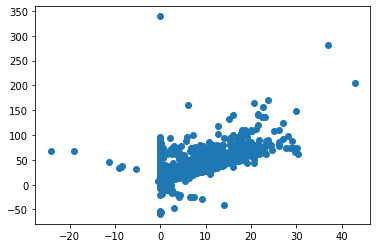

In [7]:
plt.scatter(df_mini.trip_distance,df_mini.total_amount)

<AxesSubplot:xlabel='tpep_pickup_datetime', ylabel='total_amount'>

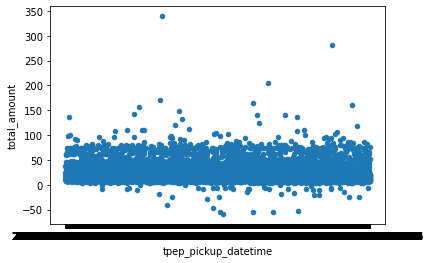

In [8]:
df_mini.plot.scatter('tpep_pickup_datetime', "total_amount" )

In [ ]:
for feature in df_mini.columns:
    
    plt.scatter(df_mini[feature], df_mini.trip_distance)

In [ ]:
heatmap_plot = sns.heatmap(df, center=0, cmap='gist_ncar')

plt.show()

In [ ]:

df_mini.plot('tpep_pickup_datetime', "total_amount", kind="scatter")

<AxesSubplot:xlabel='tpep_pickup_datetime', ylabel='total_amount'>

Посмотрим на графиках, как целевой признак зависит от остальных

In [ ]:
df.plot('tpep_pickup_datetime', "total_amount", subplots=True, kind="scatter")

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "total_amount", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

KeyboardInterrupt: 